In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

In [22]:
url = "https://raw.githubusercontent.com/enricochandran/01.-Machine-Learning/refs/heads/main/06.%20Week%206/clusteringweek06/clusteringweek06.csv"
df = pd.read_csv(url)
print(df.head())

    x1        x2        x3        x4        x5        x6        x7        x8  \
0  1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1  1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2  1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3  1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4  1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   

         x9       x10  ...       x13       x14       x15       x16       x17  \
0 -0.171128  0.124676  ... -0.156436  0.082245  0.135752 -0.024017 -0.108351   
1 -0.207693  0.170883  ... -0.254341  0.022786  0.163320  0.012022 -0.090974   
2 -0.219153  0.232538  ... -0.237384  0.050791  0.207338  0.083536 -0.050691   
3 -0.098181  0.270375  ... -0.317084 -0.011567  0.100413 -0.050224 -0.136009   
4 -0.172700  0.266434  ... -0.298524  0.037439  0.219153  0.062837 -0.048885   

        x18       x19       x20       

In [23]:
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

print("\nSummary Statistics:\n", df.describe())

correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

Data Shape: (7195, 22)

Data Types:
 x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
dtype: object

Missing Values:
 x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
dtype: int64

Missing Value Percentage:
 x1     0.0
x2     0.0
x3     0.0
x4     0.0
x5     0.0
x6     0.0
x7     0.0
x8     0.0
x9     0.0
x10    0.0
x11    0.0
x12    0.0
x13    0.0
x14    0.0
x15    0.0
x16    0.0
x17    0.0
x18    0.0
x19    0.0
x20    0.0
x21    0.0
x22    0.0
dtype: float64

Summary Statistics:
                 x1           x2           x3           x4           x5  \
count  71

In [24]:
numerical_features = ['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22']

scaler = StandardScaler()

scaler.fit(df[numerical_features])

scaled_features = scaler.transform(df[numerical_features])

df[numerical_features] = pd.DataFrame(scaled_features, index=df.index, columns=numerical_features)

display(df.describe())

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
count,7195.000000,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,...,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7195.000000,7.195000e+03,7.195000e+03,7.195000e+03
mean,0.989885,1.580081e-16,-3.160162e-17,-3.318170e-16,-9.480487e-17,-6.320325e-17,-1.580081e-17,6.320325e-17,-7.900406e-17,3.950203e-17,...,3.160162e-17,1.580081e-17,1.580081e-17,-1.580081e-17,9.480487e-17,4.740243e-17,0.000000,3.160162e-17,4.740243e-17,6.320325e-17
std,0.069016,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,...,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069,1.000069e+00,1.000069e+00,1.000069e+00
min,-0.251179,-4.558260e+00,-2.835774e+00,-5.730376e+00,-4.689655e+00,-4.222105e+00,-3.136579e+00,-4.954132e+00,-3.997445e+00,-7.933425e+00,...,-3.843372e+00,-3.613917e+00,-3.280338e+00,-4.509639e+00,-3.695589e+00,-9.053491e+00,-7.648086,-3.274841e+00,-5.891010e+00,-3.782383e+00
25%,1.000000,-7.210034e-01,-6.556853e-01,-6.815309e-01,-4.629605e-01,-7.089302e-01,-7.254735e-01,-5.394838e-01,-6.903220e-01,-4.495243e-01,...,-7.434950e-01,-6.146491e-01,-8.218417e-01,-5.138205e-01,-6.551746e-01,-5.886854e-01,-0.685797,-7.191665e-01,-6.912932e-01,-7.051159e-01
50%,1.000000,-9.787851e-02,-1.388897e-01,2.212265e-01,2.108925e-01,-2.147770e-01,-2.989222e-01,1.172461e-01,3.413695e-01,5.885357e-02,...,2.222515e-01,-7.521819e-02,-2.212693e-01,-8.180996e-03,1.745001e-01,4.797713e-02,-0.038187,-2.055943e-02,-7.600078e-02,1.442491e-01
75%,1.000000,6.539691e-01,4.533826e-01,7.102452e-01,5.872096e-01,6.479695e-01,5.074717e-01,6.490242e-01,7.663936e-01,4.856939e-01,...,8.394058e-01,5.140923e-01,6.348228e-01,5.419523e-01,8.203901e-01,6.389138e-01,0.675971,5.796250e-01,6.582274e-01,8.689013e-01
max,1.000000,3.093771e+00,2.613861e+00,3.455684e+00,3.842395e+00,7.194984e+00,5.842724e+00,4.747728e+00,3.406890e+00,3.672732e+00,...,3.841943e+00,4.032634e+00,4.107949e+00,5.242714e+00,4.291889e+00,7.156018e+00,7.556147,5.533108e+00,4.435742e+00,2.792111e+00


In [25]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df[['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22']])
df['kmeans_labels'] = kmeans.labels_

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df[['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22']])
df['dbscan_labels'] = dbscan.labels_

display(df.head())

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x15,x16,x17,x18,x19,x20,x21,x22,kmeans_labels,dbscan_labels
0,1.0,-0.780502,-1.581769,-1.529944,1.168666,1.352327,0.597119,-1.287190,-1.672333,0.540390,...,1.265956,-0.551081,-1.427291,-1.007678,0.483477,1.177905,1.023939,-0.595699,1,-1
1,1.0,-0.695439,-1.556680,-1.107634,1.300622,1.415359,0.363097,-1.909853,-1.876612,0.903961,...,1.412903,-0.250524,-1.301412,-0.758490,0.171681,0.779239,0.565657,-0.474036,1,-1
2,1.0,-0.783334,-1.495953,-0.990973,0.915536,0.763498,0.058992,-2.079764,-1.940639,1.389091,...,1.647536,0.345883,-1.009606,-0.369957,-0.208962,0.299030,0.777644,-0.084297,1,-1
3,1.0,-0.453678,-0.729537,-0.727096,1.505993,2.184868,0.098592,-1.667990,-1.264799,1.686808,...,1.077586,-0.769643,-1.627648,-2.181026,-0.981638,-0.016165,-0.704780,-0.515365,1,-1
4,1.0,-1.078343,-1.440441,-0.867225,1.252998,1.255819,0.048313,-2.279164,-1.681117,1.655798,...,1.710511,0.173262,-0.996517,-0.717936,-0.473426,0.232532,0.897212,-0.067430,1,-1


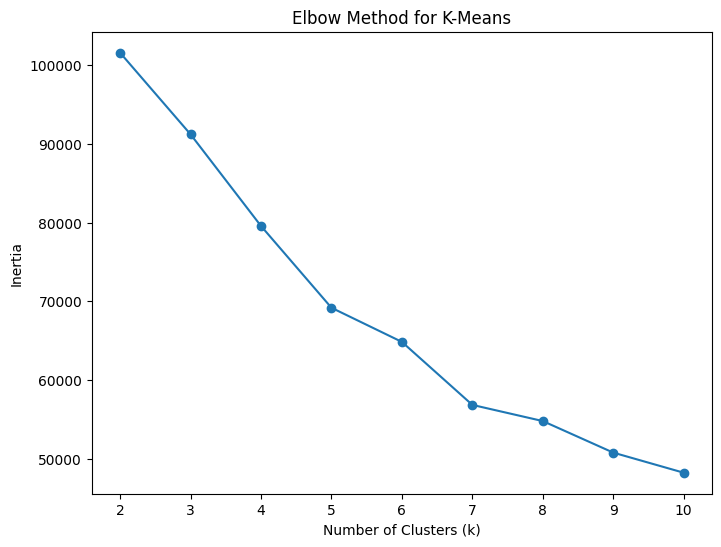

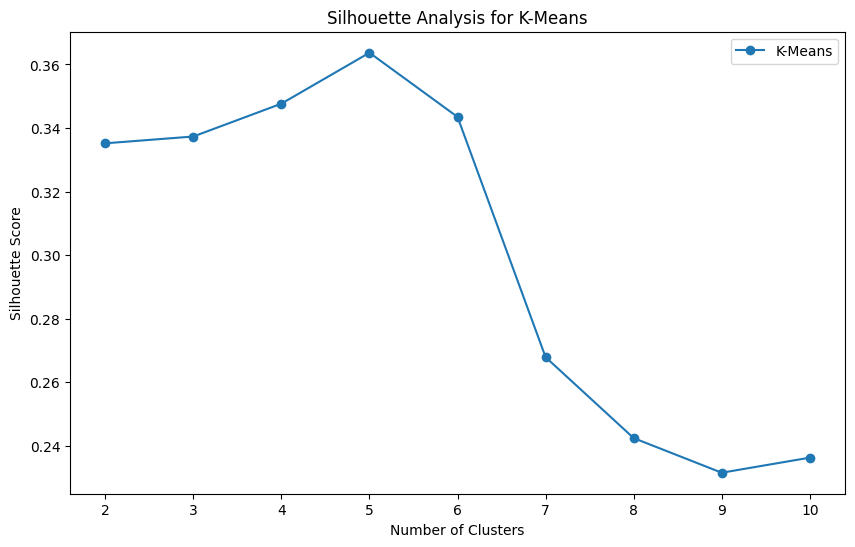

K-Means Metrics:
k = 2: silhouette = 0.33517674689025356
k = 3: silhouette = 0.3373141603441815
k = 4: silhouette = 0.3476459993335675
k = 5: silhouette = 0.36367193276722626
k = 6: silhouette = 0.34348225485982775
k = 7: silhouette = 0.2678955011299812
k = 8: silhouette = 0.24243897242675536
k = 9: silhouette = 0.23154780454931487
k = 10: silhouette = 0.23628700344352196

DBSCAN Metrics:
silhouette: -0.22350837099525983
calinski_harabasz: 16.00024170906174
davies_bouldin: 1.7559635396648272


In [26]:
# Elbow Method for K-Means
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()

metrics = {
    'kmeans': {
        'silhouette': [],
        'calinski_harabasz': [],
        'davies_bouldin': []
    },
    'dbscan': {
        'silhouette': [],
        'calinski_harabasz': [],
        'davies_bouldin': []
    }
}

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22']])
    labels = kmeans.labels_
    metrics['kmeans']['silhouette'].append(silhouette_score(df[['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22']], labels))
    metrics['kmeans']['calinski_harabasz'].append(calinski_harabasz_score(df[['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22']], labels))
    metrics['kmeans']['davies_bouldin'].append(davies_bouldin_score(df[['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22']], labels))

labels = df['dbscan_labels']
metrics['dbscan']['silhouette'].append(silhouette_score(df[['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22']], labels))
metrics['dbscan']['calinski_harabasz'].append(calinski_harabasz_score(df[['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22']], labels))
metrics['dbscan']['davies_bouldin'].append(davies_bouldin_score(df[['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22']], labels))


plt.figure(figsize=(10, 6))
plt.plot(k_range, metrics['kmeans']['silhouette'], marker='o', label='K-Means')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for K-Means")
plt.legend()
plt.show()


print("K-Means Metrics:")
for k, metrics_k in zip(k_range, metrics['kmeans']['silhouette']):
    print(f"k = {k}: silhouette = {metrics_k}")

print("\nDBSCAN Metrics:")
for metric, value in metrics['dbscan'].items():
    print(f"{metric}: {value[0]}")

In [27]:
# Summary table
summary_data = {
    'k': k_range,
    'KMeans_Silhouette': metrics['kmeans']['silhouette'],
    'KMeans_Calinski_Harabasz': metrics['kmeans']['calinski_harabasz'],
    'KMeans_Davies_Bouldin': metrics['kmeans']['davies_bouldin']
}
summary_df = pd.DataFrame(summary_data)
summary_df = pd.concat([summary_df, pd.DataFrame({
    'k': ['DBSCAN'],
    'KMeans_Silhouette': [metrics['dbscan']['silhouette'][0]],
    'KMeans_Calinski_Harabasz': [metrics['dbscan']['calinski_harabasz'][0]],
    'KMeans_Davies_Bouldin': [metrics['dbscan']['davies_bouldin'][0]]
})], ignore_index=True)

display(summary_df)

,k,KMeans_Silhouette,KMeans_Calinski_Harabasz,KMeans_Davies_Bouldin
0,2,0.335177,3507.651478,1.285364
1,3,0.337314,2361.454885,1.236326
2,4,0.347646,2155.178925,1.536293
3,5,0.363672,2128.716642,1.307858
4,6,0.343482,1912.848778,1.460474
5,7,0.267896,1986.826688,1.471155
6,8,0.242439,1805.067833,1.418774
7,9,0.231548,1774.797858,1.508268
8,10,0.236287,1703.117473,1.468398
9,DBSCAN,-0.223508,16.000242,1.755964


In [28]:
best_k_kmeans = 5
print(f"Based on silhouette analysis, the optimal k for KMeans is: {best_k_kmeans}")
print("DBSCAN results indicate poorly defined clusters. Consider tuning 'eps' and 'min_samples'.")

Based on silhouette analysis, the optimal k for KMeans is: 5
DBSCAN results indicate poorly defined clusters. Consider tuning 'eps' and 'min_samples'.


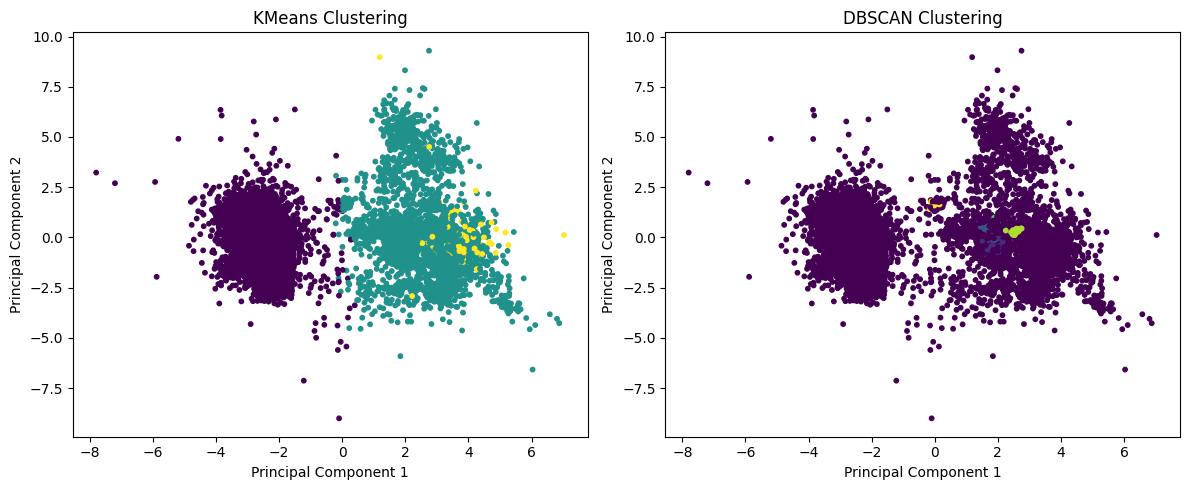

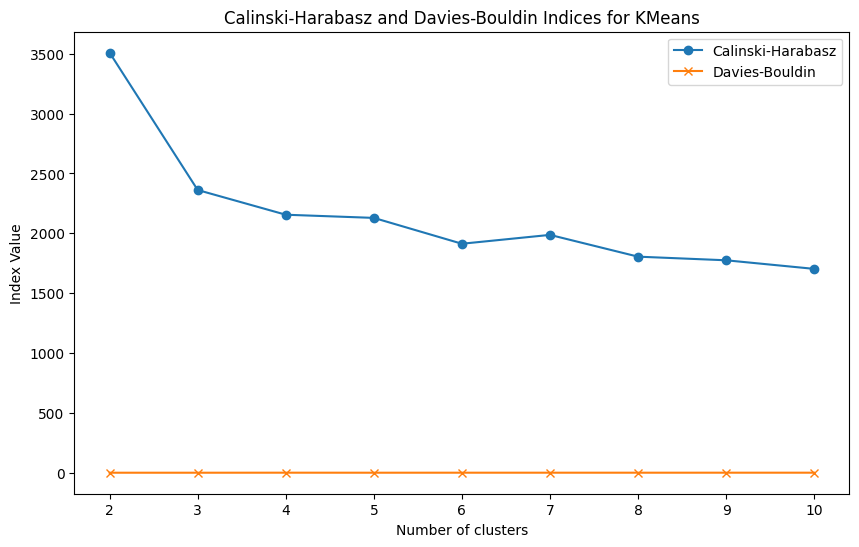

DBSCAN Metrics:
  Calinski-Harabasz: 16.00024170906174
  Davies-Bouldin: 1.7559635396648272


In [29]:
# Visualisasi Clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22']])
df['pca_x'] = pca_result[:, 0]
df['pca_y'] = pca_result[:, 1]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['pca_x'], df['pca_y'], c=df['kmeans_labels'], cmap='viridis', s=10)
plt.title("KMeans Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(1, 2, 2)
plt.scatter(df['pca_x'], df['pca_y'], c=df['dbscan_labels'], cmap='viridis', s=10)
plt.title("DBSCAN Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()

# Visualisasi evaluasi metriks lainnya (Calinski-Harabasz dan Davies-Bouldin)
kmeans_summary = summary_df[summary_df['k'] != 'DBSCAN']
plt.figure(figsize=(10, 6))
plt.plot(kmeans_summary['k'], kmeans_summary['KMeans_Calinski_Harabasz'], marker='o', label="Calinski-Harabasz")
plt.plot(kmeans_summary['k'], kmeans_summary['KMeans_Davies_Bouldin'], marker='x', label="Davies-Bouldin")
plt.xlabel("Number of clusters")
plt.ylabel("Index Value")
plt.title("Calinski-Harabasz and Davies-Bouldin Indices for KMeans")
plt.legend()
plt.show()

dbscan_summary = summary_df[summary_df['k'] == 'DBSCAN']
print("DBSCAN Metrics:")
print(f"  Calinski-Harabasz: {dbscan_summary['KMeans_Calinski_Harabasz'].iloc[0]}")
print(f"  Davies-Bouldin: {dbscan_summary['KMeans_Davies_Bouldin'].iloc[0]}")

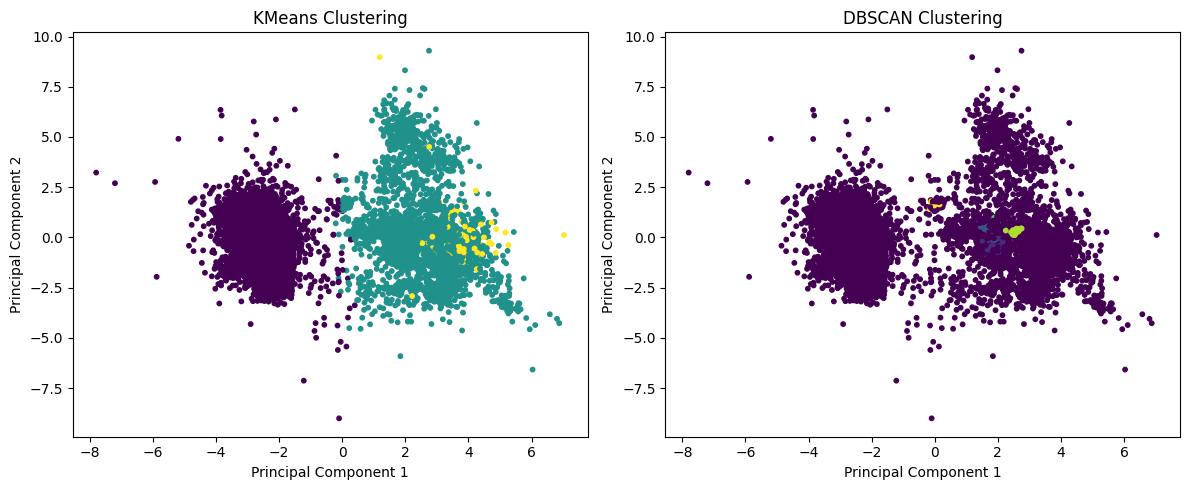

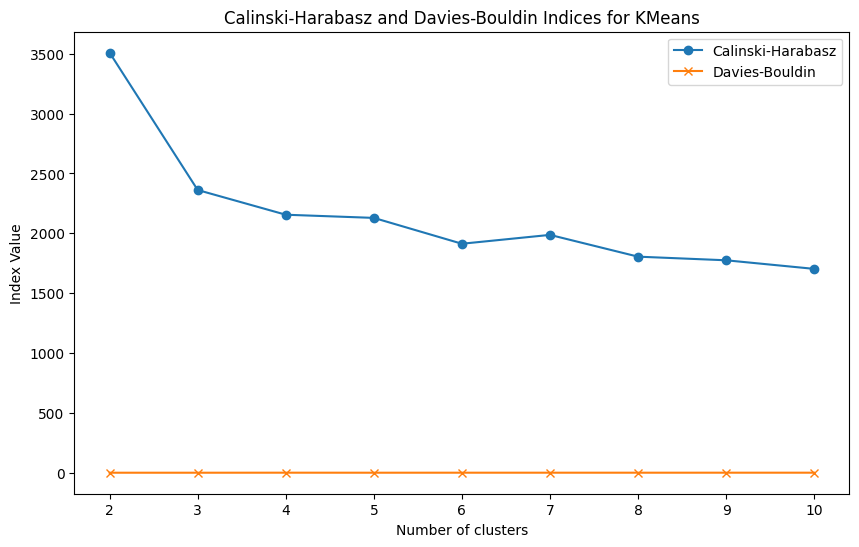

DBSCAN Metrics:
Calinski-Harabasz: 16.00024170906174
Davies-Bouldin: 1.7559635396648272


In [30]:
# Visualisasi Clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22']])
df['pca_x'] = pca_result[:, 0]
df['pca_y'] = pca_result[:, 1]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['pca_x'], df['pca_y'], c=df['kmeans_labels'], cmap='viridis', s=10)
plt.title("KMeans Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(1, 2, 2)
plt.scatter(df['pca_x'], df['pca_y'], c=df['dbscan_labels'], cmap='viridis', s=10)
plt.title("DBSCAN Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()

# Visualisasi evaluasi matriks lainnya (Calinski-Harabasz dan Davies-Bouldin)
kmeans_summary = summary_df[summary_df['k'] != 'DBSCAN']
plt.figure(figsize=(10, 6))
plt.plot(kmeans_summary['k'], kmeans_summary['KMeans_Calinski_Harabasz'], marker='o', label="Calinski-Harabasz")
plt.plot(kmeans_summary['k'], kmeans_summary['KMeans_Davies_Bouldin'], marker='x', label="Davies-Bouldin")
plt.xlabel("Number of clusters")
plt.ylabel("Index Value")
plt.title("Calinski-Harabasz and Davies-Bouldin Indices for KMeans")
plt.legend()
plt.show()

dbscan_summary = summary_df[summary_df['k'] == 'DBSCAN']
print("DBSCAN Metrics:")
print(f"Calinski-Harabasz: {dbscan_summary['KMeans_Calinski_Harabasz'].iloc[0]}")
print(f"Davies-Bouldin: {dbscan_summary['KMeans_Davies_Bouldin'].iloc[0]}")

Dari semua metrik yang digunakan (Silhouette, Calinski-Harabasz, dan Davies-Bouldin), Silhouette Score umumnya dianggap sebagai metrik terbaik untuk mengevaluasi kualitas cluster, terutama untuk algoritma K-Means.

Hal ini dikarenakan:

*   Rentang yang mudah diinterpretasi: Silhouette Score berkisar dari -1 hingga 1. Nilai yang mendekati 1 menunjukkan bahwa titik data ditempatkan dengan baik dalam clusternya, nilai yang mendekati 0 menunjukkan bahwa titik data berada di dekat batas antara dua cluster, dan nilai yang mendekati -1 menunjukkan bahwa titik data mungkin telah ditempatkan di cluster yang salah.
*   Mempertimbangkan kohesi dan pemisahan: Silhouette Score mempertimbangkan kohesi (seberapa dekat titik data dalam cluster yang sama) dan pemisahan (seberapa jauh cluster yang berbeda) saat mengevaluasi kualitas cluster.
*   Berlaku untuk berbagai algoritma clustering: Silhouette Score dapat digunakan untuk mengevaluasi kualitas cluster yang dihasilkan oleh berbagai algoritma clustering, termasuk K-Means, DBSCAN, dan lainnya.


# **1. Standardisasi Data (Scaling)**

scaler = StandardScaler()

scaler.fit(df[numerical_features])

scaled_features = scaler.transform(df[numerical_features])

Persamaan yang mendasari fungsi StandardScaler adalah:

z = (x - u) / s

di mana:

*   z adalah nilai data yang telah distandardisasi.
*   x adalah nilai data asli.
*   u adalah rata-rata (mean) dari fitur.
*   s adalah standar deviasi dari fitur.

# **2. Inertia dalam K-Means**

inertia.append(kmeans.inertia_)

Inertia mengukur jumlah jarak kuadrat antara setiap titik data dan pusat cluster terdekatnya. Persamaan Inertia:

Inertia = Σ Σ ||xᵢ - cⱼ||²

di mana:

*   xᵢ adalah titik data ke-i.
*   cⱼ adalah pusat cluster ke-j.
*   || ||² menunjukkan jarak kuadrat Euclidean.

# **3. Silhouette Score**

metrics['kmeans']['silhouette'].append(silhouette_score(df[['x2', 'x3', ..., 'x22']], labels))

Silhouette Score mengukur seberapa mirip suatu titik data dengan clusternya sendiri dibandingkan dengan cluster lain. Persamaannya:

Silhouette Score = (b - a) / max(a, b)

di mana:

*   a adalah jarak rata-rata antara titik data dan semua titik data lainnya di cluster yang sama.
*   b adalah jarak rata-rata antara titik data dan semua titik data di cluster terdekat.

# **4. Calinski-Harabasz Score**

metrics['kmeans']['calinski_harabasz'].append(calinski_harabasz_score(df[['x2', 'x3', ..., 'x22']], labels))

Calinski-Harabasz Score mengukur rasio antara dispersi antar-cluster dan dispersi intra-cluster. Persamaannya:

Calinski-Harabasz Score = [ (SSB / (k - 1)) / (SSW / (n - k)) ]

di mana:

*   SSB adalah jumlah kuadrat antara-cluster.
*   SSW adalah jumlah kuadrat intra-cluster.
*   k adalah jumlah cluster.
*   n adalah jumlah total titik data.

# **5. Davies-Bouldin Score**

metrics['kmeans']['davies_bouldin'].append(davies_bouldin_score(df[['x2', 'x3', ..., 'x22']], labels))

Davies-Bouldin Score mengukur rata-rata kesamaan antara setiap cluster dengan cluster yang paling mirip dengannya. Persamaan yang lebih kompleks dan melibatkan perhitungan jarak antar pusat cluster dan dispersi dalam cluster. Nilai yang lebih rendah menunjukkan cluster yang lebih baik.

# **6. Principal Component Analysis (PCA)**

pca = PCA(n_components=2)

pca_result = pca.fit_transform(df[['x2', 'x3', ..., 'x22']])

PCA digunakan untuk reduksi dimensi. Secara matematis, PCA melibatkan pencarian eigenvector dan eigenvalue dari matriks kovariansi data. Eigenvector dengan eigenvalue terbesar mewakili arah dengan varians terbesar dalam data, dan digunakan sebagai komponen utama.